# 7. Métricas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Etiquetas de Ejemplo

Clasificación binaria probabilística:

In [2]:
y_true = np.array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0])
y_pred_proba = np.array([.99, .98, .72, .70, .65, .51, .39, .24, .11, .01])

Clasificación binaria determinista:

In [3]:
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

Clasificación multiclase determinista:

In [5]:
y_true2 = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred2 = ["ant", "ant", "cat", "cat", "ant", "cat"]

## Precision, Recall y F1

La precision es la proporción de positivos propuestos por el modelo que fueron correctos:

$$Precision = \frac{|Train \cap Test|}{|Train|} = \frac{TP}{TP + FP}$$

La recall es la proporción de positivos correctos que fueron encontrados por el modelo:

$$Recall = \frac{|Train \cap Test|}{|Test|} = \frac{TP}{TP + FN}$$

$$F_1 = \frac{2 * Precision * Recall}{Precision + Recall}$$

Para clasificación multiclase, se puede calcular una métrica por clase. Luego, las métricas se pueden promediar para obtener resultados "macro".
Para obtener resultados "micro", se hacen primero cálculos globales para TP, FP, TN, FN y luego se calcula como un problema binario.

Podemos usar sklearn para calcularlas:

In [6]:
y_true, y_pred

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0]))

In [13]:
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [14]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)  # precision = 4 / 6 (con th=0.5), = 2 / 2 (con th=0.8)

0.6666666666666666

In [15]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)  # recall = 4 / 5 (con th=0.5), = 2 / 5 (con th=0.8)

0.8

In [16]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.7272727272727272

## Reporte de Clasificación

- [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

En clasificación binaria:

In [17]:
y_true, y_pred

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0]))

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



En clasificación multiclase:

In [20]:
y_true2, y_pred2

(['cat', 'ant', 'cat', 'cat', 'ant', 'bird'],
 ['ant', 'ant', 'cat', 'cat', 'ant', 'cat'])

In [19]:
print(classification_report(y_true2, y_pred2))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       0.00      0.00      0.00         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



/home/francolq/.virtualenvs/pln/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francolq/.virtualenvs/pln/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francolq/.virtualenvs/pln/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Matrices de Confusión

Usamos [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):


In [21]:
from sklearn.metrics import confusion_matrix

In [23]:
y_true, y_pred

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0]))

In [22]:
confusion_matrix(y_true, y_pred)

array([[3, 2],
       [1, 4]])

In [24]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

En multiclase:

In [25]:
cm = confusion_matrix(y_true2, y_pred2, labels=['ant', 'bird', 'cat'])
cm

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

Podemos usar [plot_confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) pero requiere el clasificador. Definimos nuestra propia versión:

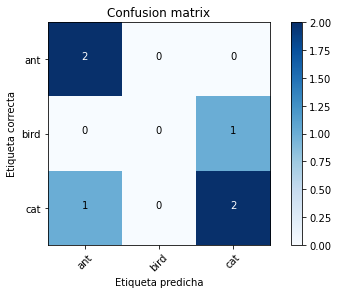

In [26]:
from utils import plot_confusion_matrix

plot_confusion_matrix(cm, ['ant', 'bird', 'cat'])

## Curvas ROC

Usamos [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) para obtener los puntos y graficamos:

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_true, y_pred_proba, drop_intermediate=True)

In [29]:
fpr, tpr, threshold

(array([0. , 0. , 0. , 0.2, 0.2, 0.6, 0.6, 1. ]),
 array([0. , 0.2, 0.4, 0.4, 0.8, 0.8, 1. , 1. ]),
 array([1.99, 0.99, 0.98, 0.72, 0.65, 0.39, 0.24, 0.01]))

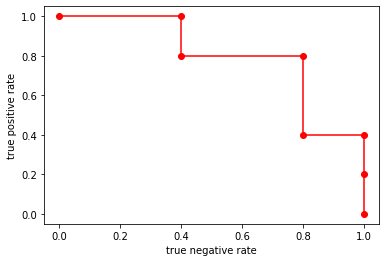

In [40]:
plt.plot(1.0 - fpr, tpr, color="red")
plt.scatter(1.0 - fpr, tpr, color="red")
#plt.xlabel("false positive rate")
plt.xlabel("true negative rate")
plt.ylabel("true positive rate")
plt.show()

In [31]:
tpr[4], fpr[4], threshold[4]

(0.8, 0.2, 0.65)

Calculamos el área bajo la curva con [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html):

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred_proba)

0.8

## Curvas PR (Precision/Recall)

Usamos [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) para obtener los puntos y graficamos:

In [33]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_true, y_pred_proba)

In [34]:
precision, recall, threshold

(array([0.625     , 0.57142857, 0.66666667, 0.8       , 0.75      ,
        0.66666667, 1.        , 1.        , 1.        ]),
 array([1. , 0.8, 0.8, 0.8, 0.6, 0.4, 0.4, 0.2, 0. ]),
 array([0.24, 0.39, 0.51, 0.65, 0.7 , 0.72, 0.98, 0.99]))

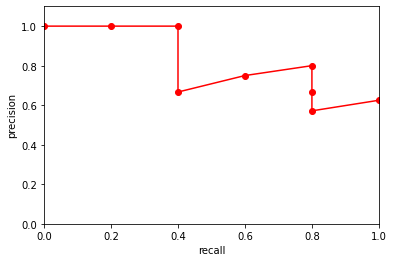

In [35]:
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.plot(recall, precision, color="red")
plt.scatter(recall, precision, color="red")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()